#Linear regression implementation by using synthetic dataset using sklearn

TEST 1: Simple 1D Data
Iteration 100: Cost = 0.0172
Iteration 200: Cost = 0.0123
Iteration 300: Cost = 0.0088
Iteration 400: Cost = 0.0062
Iteration 500: Cost = 0.0045
Iteration 600: Cost = 0.0032
Iteration 700: Cost = 0.0023
Iteration 800: Cost = 0.0016
Iteration 900: Cost = 0.0012
Iteration 1000: Cost = 0.0008
Learned weight: 1.9738
Learned bias: 0.0948
R² Score: 0.9998


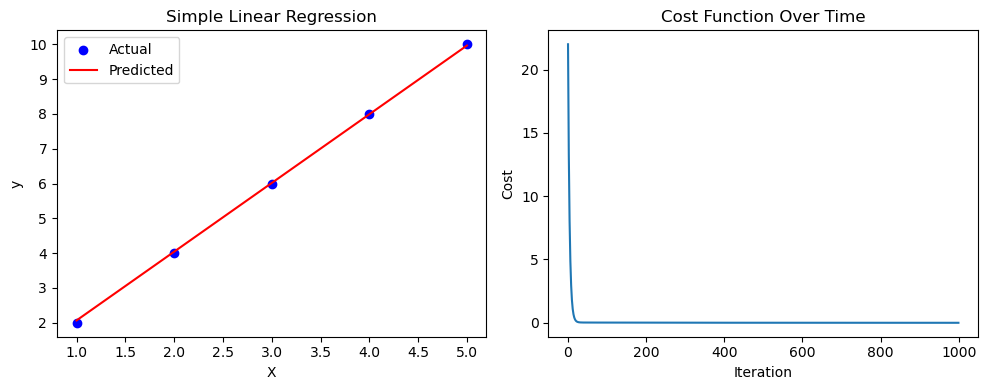

In [1]:
# import the libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.metrics import mean_squared_error, r2_score
import sys
sys.path.append('..')
from algorithms.linear_regression import LinearRegression

# Dataset 1: Simple 1D Example

print("TEST 1: Simple 1D Data")

# Create simple data
np.random.seed(42)
X_simple = np.array([[1], [2], [3], [4], [5]])
y_simple = np.array([2, 4, 6, 8, 10])

# Train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000) 
model.fit(X_simple, y_simple)

# Predictions
y_pred = model.predict(X_simple)

print(f"Learned weight: {model.weights[0]:.4f}")
print(f"Learned bias: {model.bias:.4f}")
print(f"R² Score: {model.score(X_simple, y_simple):.4f}")

# Visualize
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_simple, y_simple, color='blue', label='Actual')
plt.plot(X_simple, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Time')
plt.tight_layout()
plt.show()




TEST 2: California Housing Dataset

Current Implementation:
Iteration 100: Cost = 0.4865
Iteration 200: Cost = 0.2046
Iteration 300: Cost = 0.1653
Iteration 400: Cost = 0.1585
Iteration 500: Cost = 0.1565
Iteration 600: Cost = 0.1554
Iteration 700: Cost = 0.1546
Iteration 800: Cost = 0.1540
Iteration 900: Cost = 0.1536
Iteration 1000: Cost = 0.1533
R² Score: 0.7050
MSE: 0.2145

Scikit-learn Implementation:
R² Score: 0.7013
MSE: 0.2172


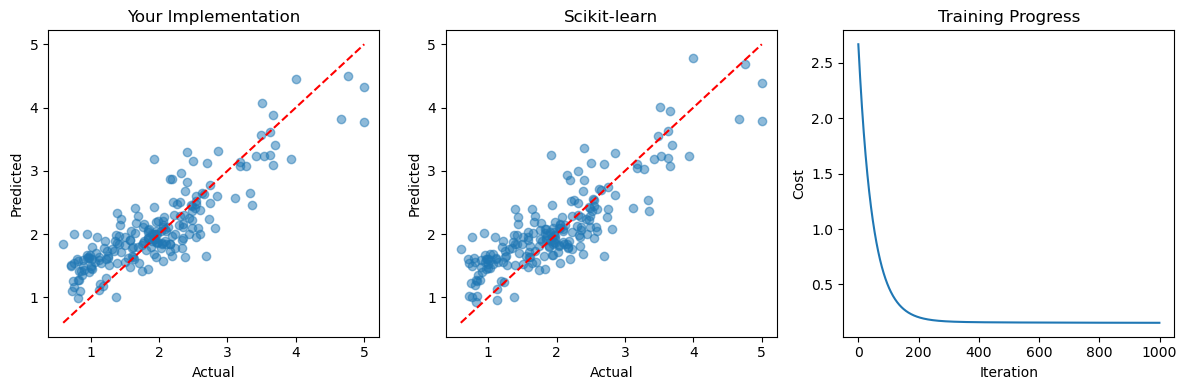

In [4]:
# Real Dataset 2: California Housing (subset)


print("TEST 2: California Housing Dataset")

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load data
housing = fetch_california_housing()
X_housing = housing.data[:1000]  # Use subset for faster training
y_housing = housing.target[:1000]

# Standardize features (important!)
scaler = StandardScaler()
X_housing_scaled = scaler.fit_transform(X_housing)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_housing_scaled, y_housing, test_size=0.2, random_state=42
)


print("\nCurrent Implementation:")
model_yours = LinearRegression(learning_rate=0.01, n_iterations=1000)
model_yours.fit(X_train, y_train)
y_pred_yours = model_yours.predict(X_test)
print(f"R² Score: {model_yours.score(X_test, y_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_yours):.4f}")

# Scikit-learn comparison
print("\nScikit-learn Implementation:")
model_sklearn = SklearnLR()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred_sklearn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}")

# Compare predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_yours, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Your Implementation')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scikit-learn')

plt.subplot(1, 3, 3)
plt.plot(model_yours.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.tight_layout()
plt.show()


Current Implementation:
Iteration 100: Cost = 1424.3794
Iteration 200: Cost = 1422.8507
Iteration 300: Cost = 1422.2854
Iteration 400: Cost = 1421.8342
Iteration 500: Cost = 1421.4503
Iteration 600: Cost = 1421.1121
Iteration 700: Cost = 1420.8083
Iteration 800: Cost = 1420.5327
Iteration 900: Cost = 1420.2813
Iteration 1000: Cost = 1420.0513
R² Score: 0.4315
MSE: 3029.3971

Scikit-learn Implementation:
R² Score: 0.4384
MSE: 2992.5812


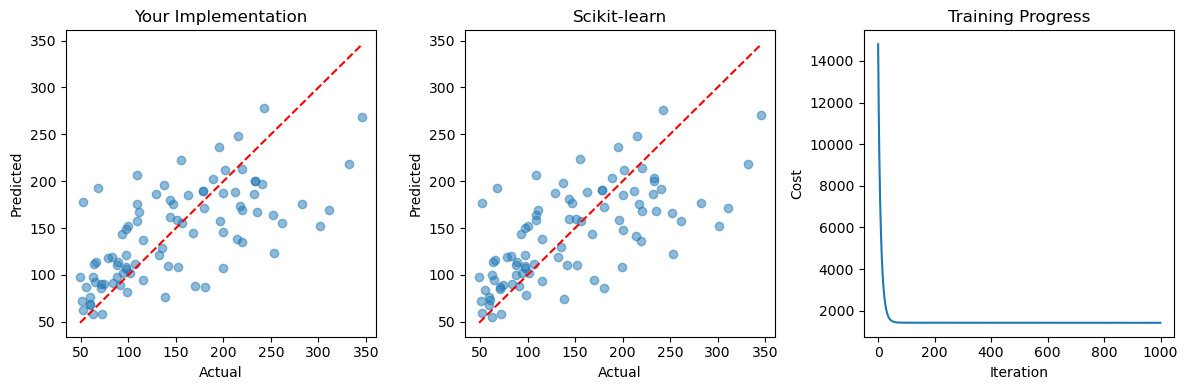

In [ ]:
# Dataset 2: load_diabetes for linear regression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load data
diabetes = load_diabetes()
X_diabetes = diabetes.data[:1000]  # Use subset for faster training
y_diabetes = diabetes.target[:1000]

# Standardize features (important!)
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=1
)


print("\nCurrent Implementation:")
model_yours = LinearRegression(learning_rate=0.05, n_iterations=1000) # reduce the learning rate when the cost function or mse rate not reduced
model_yours.fit(X_train, y_train)
y_pred_yours = model_yours.predict(X_test)
print(f"R² Score: {model_yours.score(X_test, y_test):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_yours):.4f}")

# Scikit-learn comparison
print("\nScikit-learn Implementation:")
model_sklearn = SklearnLR()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred_sklearn):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}")

# Compare predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_yours, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Your Implementation')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scikit-learn')

plt.subplot(1, 3, 3)
plt.plot(model_yours.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.tight_layout()
plt.show()